# Projet Data Visualisation  Partie 1 : Exploration visuelle du jeu de données

Ce projet a pour objectif de construire une **application d’aide à la décision marketing** à partir d’un jeu de données réel de transactions e-commerce appelé **Online Retail II**, publié par l’UCI Machine Learning Repository.

Le but final est de permettre à une équipe marketing de :
- mesurer la **rétention client** par cohortes d’acquisition ;
- construire une **segmentation RFM** (Recency, Frequency, Monetary) ;
- estimer la **valeur vie client (Customer Lifetime Value – CLV)** par différentes méthodes ;
- simuler des **scénarios business** afin d’en mesurer l’impact sur la rentabilité.

Ce notebook a pour objectif d'explorer et de comprendre le jeu de données *Online Retail II (UCI)* afin de réaliser des graphiques permettant la visualisation de données et leur lien et de préparer la conception de l’application Streamlit d’aide à la décision marketing.

### Objectifs de cette première partie :
- Import, chargement et nettoyage des données
- Explorer la structure du jeu de données et sa qualité.
- Identifier les grandes tendances commerciales (volume, saisonnalité, pays).
- Préparer les analyses de **cohortes**, **RFM** et **CLV** qui seront utilisées dans la partie application.


## 1️- Importation et aperçu des données

Dans cette première étape, nous importons les bibliothèques principales, chargeons le fichier Excel `Online Retail II`, et observons les premières lignes du jeu de données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:/Users/rolan/projet_data_viz_main/data/online_retail_II.xlsx"

excel_file = pd.ExcelFile(path)

# Liste des feuilles disponibles dans le classeur
excel_file.sheet_names




Matplotlib is building the font cache; this may take a moment.


['Year 2009-2010', 'Year 2010-2011']

Le dataset *Online Retail II (UCI)* contient deux feuilles correspondant à deux périodes :
- **2009–2010**
- **2010–2011**

Elles représentent donc deux années d’activité continues, qu’il faudra ensuite **fusionner** pour obtenir un jeu de données complet couvrant la période **du 1er décembre 2009 au 9 décembre 2011** que nous pourrons par la suite exploiter.

Avant de les combiner, il est important d’examiner la structure d’une seule feuille afin de comprendre :
- quelles colonnes sont présentes ;
- quels types de données elles contiennent ;
- et comment sont organisées les transactions.


## Exploration de la première feuille

L’objectif de cette étape est de :
1. Charger la première feuille (*Year 2009-2010*) dans un DataFrame pandas.
2. Afficher ses dimensions (nombre de lignes et de colonnes).
3. Visualiser les premières lignes pour avoir un aperçu du contenu.

In [2]:
# Chargement de la 1ère feuille
df_2009 = pd.read_excel(excel_file, sheet_name="Year 2009-2010")

# Dimensions du DataFrame
print("Dimensions :", df_2009.shape)

# Aperçu des premières lignes
df_2009.head()


Dimensions : (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Vérification de la structure des deux feuilles

Avant de fusionner les deux feuilles, il est nécessaire de s’assurer qu’elles ont :
- le même nombre de colonnes,
- les mêmes noms de colonnes,
- et des types de données compatibles.

Cette vérification permet de confirmer que les deux périodes d’activité ont bien été enregistrées avec le même format.

In [3]:
# Chargement de la 2ème feuille
df_2010 = pd.read_excel(excel_file, sheet_name="Year 2010-2011")

# Vérification des colonnes
cols_2009 = df_2009.columns.tolist()
cols_2010 = df_2010.columns.tolist()

print("Les colonnes pour l'année 2009-2010:")
print(cols_2009)
print("\nLes colonnes pour l'année 2010-2011:")
print(cols_2010)

# Comparaison des colonnes entre les deux feuilles
print("\nLes colonnes sont identiques :", cols_2009 == cols_2010)


Les colonnes pour l'année 2009-2010:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Les colonnes pour l'année 2010-2011:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Les colonnes sont identiques : True


## Fusion des deux feuilles en un seul jeu de données

Maintenant que nous nous sommes assurés que les deux datasets avaient la même structure, nous pouvons les fusionner.

Pour garder une trace facilement accessible de l'année, nous allons ajouter une colonne d'identification de chacune des 2 feuilles.

Nous observerons ensuite le dataset final pour s'assurer de la bonne fusion.

In [4]:
# Ajout d'une colonne d'identification d'année (si on veut directement trier par année plutôt que par période)
df_2009['Period'] = '2009-2010'
df_2010['Period'] = '2010-2011'

# Fusion verticale des deux DataFrames
df = pd.concat([df_2009, df_2010], ignore_index=True)

# Aperçu global
print(f"Nombre total de lignes après fusion : {len(df):,}")
print("\nAperçu du dataset fusionné :")
display(df.head())


print("\nInformations générales :")
df.info()

print("\nValeurs manquantes par colonne :")
print(df.isna().sum())

Nombre total de lignes après fusion : 1,067,371

Aperçu du dataset fusionné :


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Period
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-2010



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Period       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 73.3+ MB

Valeurs manquantes par colonne :
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
Period   

Maintenant que le jeu de donnée est complet et unifié, nous allons pouvoir passer au nettoyage de celui-ci.

## 2️- Nettoyage et préparation des données

Afin de garantir la fiabilité des analyses et des visualisations, nous nettoyons le dataset pour retirer les valeurs incohérentes, les doublons, et les factures invalides.  
L’objectif est d’obtenir un jeu de données propre, cohérent et prêt pour les analyses suivantes (cohortes, RFM, CLV).

### Étapes de nettoyage appliquées :
- Suppression des factures d’annulation (`Invoice` commençant par "C")
- Suppression des clients non identifiés (`Customer ID` manquant)
- Suppression des quantités négatives ou nulles
- Suppression des doublons
- Création d’une variable de revenu total (`TotalPrice = Quantity × Price`)
- Conversion des dates en format `datetime`
- Vérification de la période couverte par les données


In [5]:
import os

# Suppression des lignes sans identifiant client
df = df.dropna(subset=['Customer ID'])

# Suppression des factures d’annulation (Invoice commençant par "C")
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Suppression des lignes avec quantité négative ou nulle
df = df[df['Quantity'] > 0]

# Suppression des doublons
df = df.drop_duplicates()

# Calcul du montant total de la ligne
df['TotalPrice'] = df['Quantity'] * df['Price']

# Conversion en datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Vérification de la plage de dates
print(" Période couverte :", df['InvoiceDate'].min(), "→", df['InvoiceDate'].max())


 Période couverte : 2009-12-01 07:45:00 → 2011-12-09 12:50:00


### Sauvegarde du dataset propre

Le dataset nettoyé est sauvegardé dans `../data/processed/online_retail_clean.csv`.  
Il sera utilisé pour l’exploration visuelle, puis pour la construction de l’application Streamlit.


In [6]:
# Sauvegarde du dataset propre
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/online_retail_clean.csv', index=False)

print("Données nettoyées enregistrées dans ../data/processed/online_retail_clean.csv")


Données nettoyées enregistrées dans ../data/processed/online_retail_clean.csv


## 3 - Analyse de la qualité des données

Avant d'aller plus loin dans l'exploration visuelle, nous évaluons la qualité du dataset afin d'identifier les éventuels points d'attention : valeurs manquantes, doublons, outliers, règles d’annulation et cohérence temporelle.

Cette étape permet de valider que les données sont fiables pour les futures analyses (cohortes, RFM, CLV).

### Vérification des doublons et valeurs manquantes

In [7]:
# On vérifie par colonne les valeurs manquantes pour s'assurer qu'il n'y ait pas de problèmes
print("Valeurs manquantes par colonne :")
print(df.isna().sum())

# Vérification des doublons
print("Nombre de doublons restants :", df.duplicated().sum())


Valeurs manquantes par colonne :
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Period         0
TotalPrice     0
dtype: int64
Nombre de doublons restants : 0


### Visualisation des valeurs aberrantes (outliers)

Nous inspectons ici les distributions des variables `Quantity` et `Price` afin d’identifier la présence de valeurs extrêmes.  
Ces outliers sont fréquents dans les données e-commerce (commandes en gros, prix atypiques, erreurs de saisie).  
Ils ne sont **pas supprimés** à ce stade, mais simplement observés pour mieux comprendre la structure du dataset.


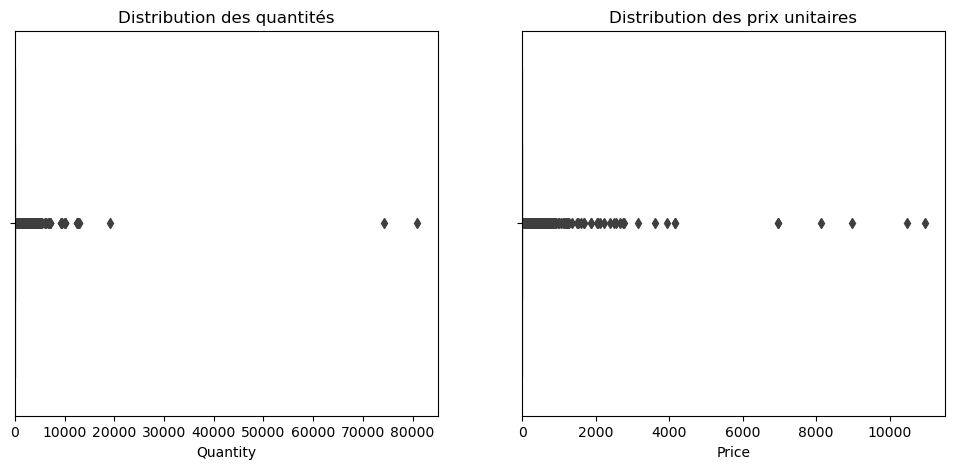

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['Quantity'], ax=axes[0])
axes[0].set_title("Distribution des quantités")
axes[0].set_xlim(left=0)

sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_title("Distribution des prix unitaires")
axes[1].set_xlim(left=0)

plt.show()


### Vérification de la granularité temporelle

Nous examinons ici la distribution des transactions dans le temps afin de vérifier que :
- les dates couvrent bien l’ensemble de la période annoncée,
- il n’existe pas de jours anormalement vides ou au contraire extrêmement chargés,
- aucune anomalie temporelle (jour manquant, date hors période, pic suspect) ne vient fausser l’analyse.

Cette étape permet de confirmer la cohérence du dataset au niveau temporel avant d’entamer les analyses descriptives.


In [9]:
# 4. Vérification de la granularité temporelle
df['date'] = df['InvoiceDate'].dt.date
transactions_par_jour = df.groupby('date').size()

print("Nombre de jours uniques :", transactions_par_jour.shape[0])
print("Minimum transactions / jour :", transactions_par_jour.min())
print("Maximum transactions / jour :", transactions_par_jour.max())


Nombre de jours uniques : 604
Minimum transactions / jour : 216
Maximum transactions / jour : 5206


## 4- Fiche synthétique du dataset

Avant d’entrer dans l’analyse visuelle, nous commençons par décrire le dataset afin d’en comprendre la structure, la granularité et les variables clés.

### Aperçu des colonnes et types

Nous affichons la liste des colonnes et leur type pour vérifier la structure du dataset après nettoyage.


In [10]:
print("Colonnes du dataset :")
print(df.columns.tolist())

print("\nTypes des variables :")
df.dtypes

Colonnes du dataset :
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Period', 'TotalPrice', 'date']

Types des variables :


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Period                 object
TotalPrice            float64
date                   object
dtype: object

## Description du dataset

| Élément | Description |
|--------|-------------|
| **Source** | Online Retail II – UCI Machine Learning Repository |
| **Période couverte** | 1 décembre 2009 → 9 décembre 2011 |
| **Volume initial** | ≈ 1,07 million de lignes brutes (avant nettoyage) |
| **Volume après nettoyage** | À compléter (`df.shape[0]`) |
| **Pays principal** | Royaume-Uni (≈ 90 % des transactions) |
| **Granularité** | Une ligne = un produit facturé |
| **Population analysée** | Uniquement les clients identifiés (`Customer ID` non nul) |
| **Variable d’intérêt principale** | `TotalPrice` (montant total de la ligne) |

---

## Dictionnaire des variables

Ce dictionnaire décrit les variables présentes dans le dataset *après nettoyage et préparation*.

| Variable | Type Pandas | Description |
|----------|-------------|-------------|
| **Invoice** | object | Numéro de facture (préfixe "C" = facture annulée) |
| **StockCode** | object | Identifiant produit |
| **Description** | object | Nom ou description du produit |
| **Quantity** | int64 | Quantité commandée |
| **InvoiceDate** | datetime64[ns] | Date et heure de la transaction |
| **Price** | float64 | Prix unitaire en livres sterling (£) |
| **Customer ID** | float64 | Identifiant unique client |
| **Country** | object | Pays du client |
| **Period** | object | Période dérivée (2009–2010 ou 2010–2011) |
| **TotalPrice** | float64 | Montant total de la ligne (`Quantity × Price`) |
| **date** | object | Date seule extraite de `InvoiceDate` (format AAAA-MM-JJ) |

## 5️- Graphique d'analyse des distributions et répartitions

### 1) Tendance mensuelle du chiffre d’affaires

Ce graphique affiche le chiffre d’affaires agrégé par mois. Il permet de visualiser :

- les saisonnalités fortes (ex. pic avant Noël),  
- les variations interannuelles,  
- les périodes de creux ou accélération,  
- l’influence d’événements externes ou campagnes marketing.

Il constitue une première analyse macro de la performance commerciale.

In [11]:
# Série mensuelle du CA
monthly = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum()
plt.figure(figsize=(12,4))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("CA mensuel (TotalPrice)")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (£)")
plt.grid(alpha=0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Invalid frequency: ME

### 2) Nombre de clients uniques par mois

Cette courbe suit l’évolution du nombre de clients distincts actifs chaque mois. Elle permet d’évaluer :

- la croissance du parc clients,  
- la fidélisation et la récurrence,  
- les effets saisonniers (ex. Noël),  
- les pics ou ralentissements d’acquisition.

Cet indicateur est central pour comprendre la dynamique globale du business.

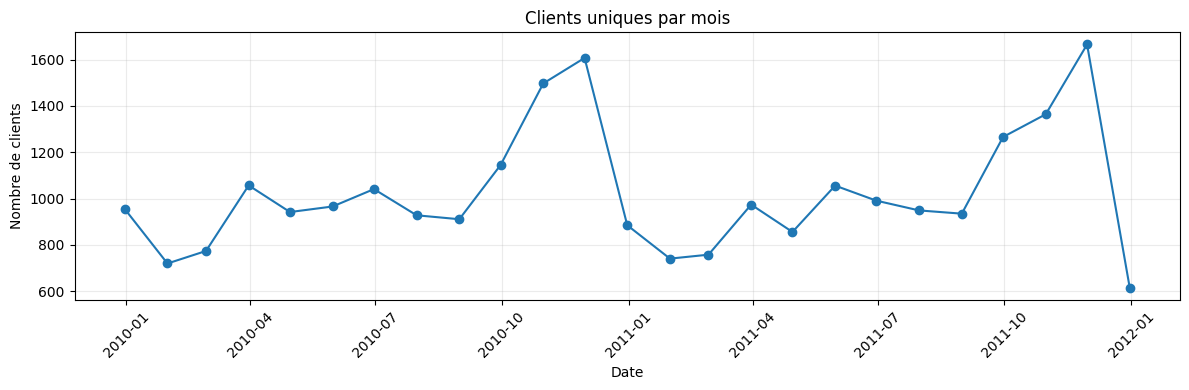

In [ ]:
clients_monthly = df.groupby(pd.Grouper(key='InvoiceDate', freq='ME'))['Customer ID'].nunique()
plt.figure(figsize=(12,4))
plt.plot(clients_monthly.index, clients_monthly.values, marker='o')
plt.title("Clients uniques par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de clients")
plt.grid(alpha=0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyse Générale des Tendances Mensuelles (CA & Clients Uniques) :**

Ces deux courbes – chiffre d’affaires mensuel et nombre de clients uniques – révèlent une dynamique très similaire, mettant en évidence le rythme saisonnier de l’activité.

* **Impact très fort de la saison de Noël :**
  Les deux métriques atteignent leurs sommets en novembre–décembre, confirmant que la majorité de la performance annuelle repose sur la période pré-fêtes.

* **Effondrement systématique en janvier :**
  On observe un creux brutal du chiffre d’affaires **et** du nombre de clients au début de chaque année. Ce pattern régulier souligne une saisonnalité structurelle du business.

* **Stabilité relative en dehors des pics :**
  Sur le reste de l’année, les deux courbes suivent une tendance modérée, avec des oscillations limitées. Cela montre une base client régulière, mais sans forte croissance hors périodes clés.

**Conclusion :**
Mises en parallèle, ces deux courbes montrent que l’activité dépend fortement de la saisonnalité : les pics de chiffre d’affaires sont directement corrélés à l’augmentation du nombre de clients actifs. Le modèle économique repose donc largement sur les mois forts (notamment Noël), ce qui pointe vers un enjeu majeur : **renforcer la fidélisation et lisser l’activité en dehors des périodes festives.**


### 3) Distribution du montant par commande (TotalPrice)

L’objectif est d’analyser la répartition du chiffre d’affaires par facture.  
Nous affichons deux vues complémentaires :

1. **Histogramme linéaire (zoom ≤ £1000)** : permet d’observer la structure des paniers classiques.  
2. **Histogramme en échelle logarithmique** : met en évidence les très grosses factures et réduit l’effet des outliers.

Cette double approche permet de comprendre comment se répartissent les revenus et d’identifier de potentiels comportements d’achat atypiques.


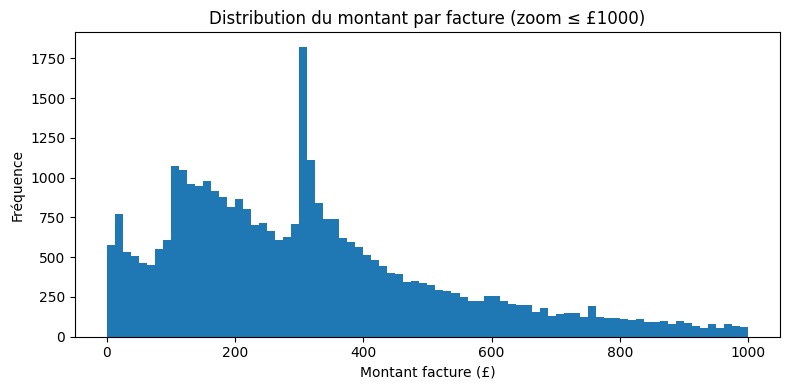

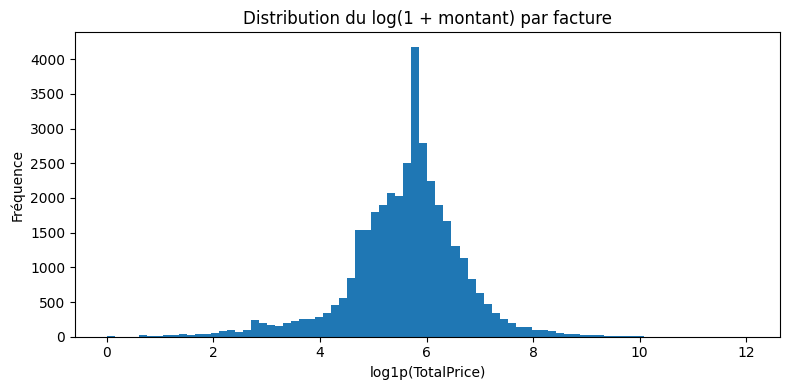

In [ ]:
# CA par facture (somme par Invoice)
invoice_totals = df.groupby('Invoice')['TotalPrice'].sum()

# Linear (zoomed)
plt.figure(figsize=(8,4))
plt.hist(invoice_totals[invoice_totals<=1000], bins=80)
plt.title("Distribution du montant par facture (zoom ≤ £1000)")
plt.xlabel("Montant facture (£)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

# Log-scale (plein spectre)
plt.figure(figsize=(8,4))
plt.hist(np.log1p(invoice_totals), bins=80)
plt.title("Distribution du log(1 + montant) par facture")
plt.xlabel("log1p(TotalPrice)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


**Analyse de la Distribution du Montant des Factures :**

Ces deux histogrammes étudient la répartition du montant total des factures, d’abord en valeur brute (zoom ≤ £1000), puis en échelle logarithmique pour visualiser l’ensemble de la distribution.

**a) Zoom ≤ £1000 (Histogramme linéaire) :**

* **Asymétrie marquée (right-skewed)** : la majorité des factures se situe entre **£50 et £400**, avec une longue traîne vers la droite.
* **Pics visibles** autour de certains montants (≈ £150, £300), suggérant des **patterns d’achat typiques** ou des paniers récurrents.
* **Faible fréquence** au-delà de £600 : les grosses commandes sont rares mais bien présentes.

**b) Version log1p (Histogramme log-transformé) :**

* La transformation logarithmique **normalise la distribution**, révélant une forme proche d’une **courbe en cloche**.
* Cela indique que les montants suivent une **distribution log-normale**, typique des données financières : beaucoup de petites valeurs, peu de très grandes.
* Cette vue permet de mieux voir la structure globale sans être écrasée par la forte densité des petites factures.

### **Conclusion :**

La combinaison des deux graphiques montre une structure classique de ventes e-commerce :
une majorité de petits paniers, quelques paniers moyens très fréquents, et une minorité de gros achats constituant la “queue” de la distribution. Le passage en log offre une vision clarifiée et facilite les comparaisons statistiques ou modèles prédictifs.


### 4) Top 10 des pays (hors Royaume-Uni) en chiffre d’affaires

Cette visualisation permet d’isoler le potentiel international en retirant volontairement le Royaume-Uni, qui domine très largement les ventes.

Elle répond aux questions suivantes :

- Quels sont les marchés étrangers les plus rentables ?  
- Y a-t-il des pays émergents sur lesquels investir ?  
- Comment se répartit le CA au-delà du marché domestique ?

Ce graphique aide à orienter des stratégies d’expansion commerciale : pays prioritaires, logistique à optimiser, marketing localisé.


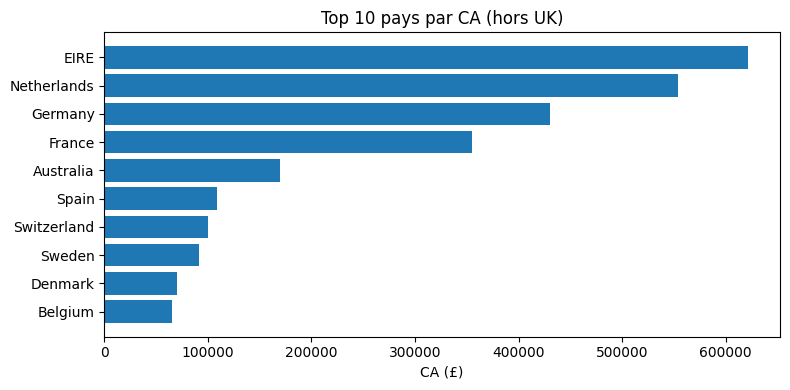

In [ ]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
# Exclure UK pour se concentrer sur les autres
if 'United Kingdom' in country_sales.index:
    top_other = country_sales.drop('United Kingdom').head(10)
else:
    top_other = country_sales.head(10)
plt.figure(figsize=(8,4))
plt.barh(top_other.index[::-1], top_other.values[::-1])
plt.title("Top 10 pays par CA (hors UK)")
plt.xlabel("CA (£)")
plt.tight_layout()
plt.show()

**Analyse du Top 10 des pays par CA (hors UK)**

* **EIRE (Irlande)** est largement en tête : son chiffre d’affaires dépasse **620k£**, bien au-dessus des autres pays.
* Les **Pays-Bas** et **l’Allemagne** suivent, avec un CA élevé mais nettement inférieur à celui de l’Irlande.
* **La France** arrive en 4ᵉ position, autour de **350k£**, montrant qu’elle reste un marché important mais moins dynamique que les trois premiers.
* Les autres pays (**Australie, Espagne, Suisse, Suède, Danemark, Belgique**) restent loin derrière, avec des niveaux de CA beaucoup plus modestes.

**Conclusion :** Le CA hors UK est **fortement concentré** sur quelques pays clés (Irlande, Pays-Bas, Allemagne, France), tandis que les autres contribuent marginalement.


### 5) Produits les plus vendus : quantité vs chiffre d’affaires

L’objectif est d’identifier les produits les plus importants selon deux angles distincts :

1. **Top 10 en quantité vendue** : met en lumière les produits à forte rotation, utiles pour la gestion des stocks.
2. **Top 10 en chiffre d’affaires** : révèle les produits qui génèrent le plus de revenu, utiles pour prioriser les actions marketing.

Comparer les deux classements permet d’identifier :
- les produits volumétriques mais peu rentables,
- les produits moins vendus mais à fort revenu,
- les références réellement stratégiques.


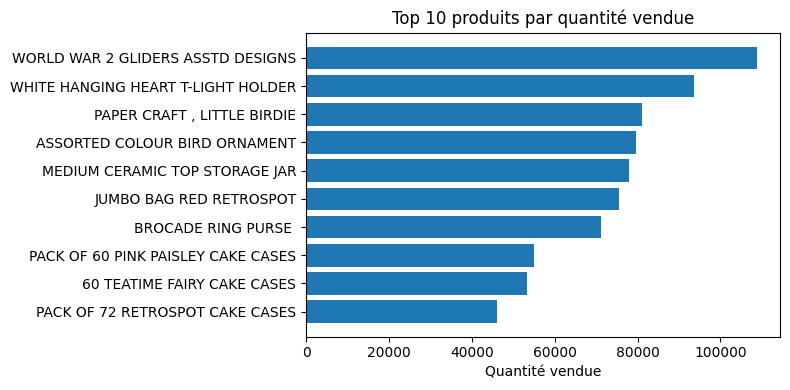

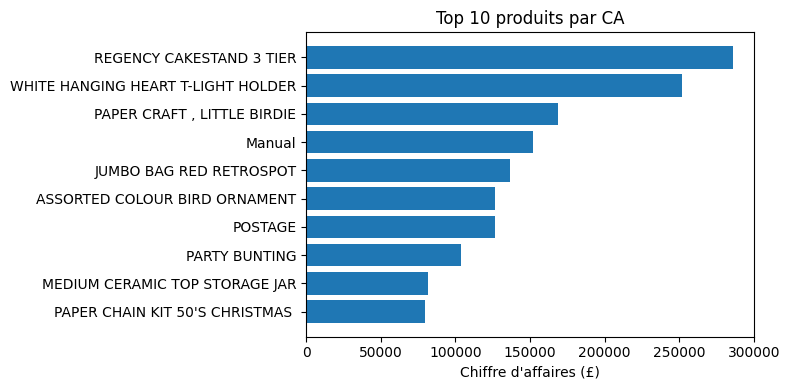

In [ ]:
# Top par quantité
top_q = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(top_q.index[::-1], top_q.values[::-1])
plt.title("Top 10 produits par quantité vendue")
plt.xlabel("Quantité vendue")
plt.tight_layout()
plt.show()

# Top par CA
top_ca = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(top_ca.index[::-1], top_ca.values[::-1])
plt.title("Top 10 produits par CA")
plt.xlabel("Chiffre d'affaires (£)")
plt.tight_layout()
plt.show()

**Analyse générale des deux graphiques (Top 10 produits vendus / Top 10 produits par CA**

Les deux graphiques montrent que les produits les plus vendus ne sont pas forcément ceux qui génèrent le plus de chiffre d’affaires. Par exemple, *WORLD WAR 2 GLIDERS* domine largement en quantité, mais ne figure pas dans le top du CA, ce qui indique un prix unitaire faible. À l’inverse, *REGENCY CAKESTAND 3 TIER* apparaît en tête du CA alors qu’il n’est pas dans le top des quantités, révélant un produit à forte valeur unitaire. On observe néanmoins quelques produits communs aux deux listes, comme *WHITE HANGING HEART T-LIGHT HOLDER* ou *PAPER CRAFT, LITTLE BIRDIE*, qui combinent bonnes ventes et bonne rentabilité.

**Conclusion :** Cela met en évidence une gamme mixte où certains produits misent sur le volume, d’autres sur la marge.


### 6) Heatmap du chiffre d’affaires par jour de la semaine et par heure

Cette visualisation met en évidence les moments les plus actifs de la boutique, en combinant deux dimensions temporelles :

- **Jour de la semaine** : permet d’identifier les jours “forts” et les jours creux.  
- **Heure de la journée** : révèle les pics d’activité au sein d’une journée.

L’objectif est d’identifier des patterns horaires (ex. forte activité en matinée) et des cycles hebdomadaires (ex. creux le week-end, pic le mardi).

Ce type de heatmap est essentiel pour comprendre les rythmes d’achat et orienter des décisions opérationnelles : staffing, campagnes marketing, push-notifications, optimisation d’horaires, etc.

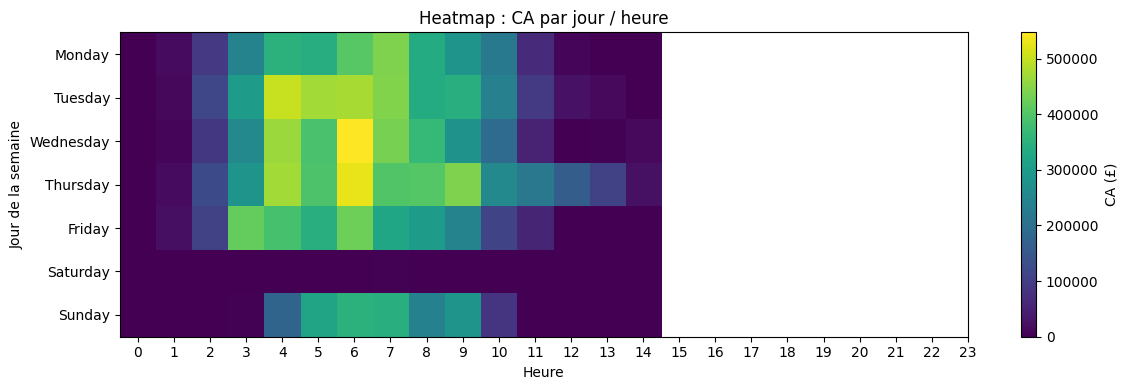

In [ ]:
# Préparer pivot
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()
pivot = df.pivot_table(values='TotalPrice', index='Weekday', columns='Hour', aggfunc='sum', fill_value=0)
# Réordonner les jours
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)

plt.figure(figsize=(12,4))
plt.imshow(pivot, aspect='auto', cmap='viridis')
plt.colorbar(label='CA (£)')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(0,24), range(0,24))
plt.title("Heatmap : CA par jour / heure")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.tight_layout()
plt.show()

**Analyse de la Heatmap Temporelle :**

Ce graphique met en évidence une concentration très nette de l'activité sur les **jours de semaine** (du lundi au jeudi), avec un pic d'intensité surprenant en **très début de matinée**, principalement entre **4h et 9h**.

* **Jours ouvrés vs Week-end :** On observe une chute drastique de l'activité le vendredi, et un arrêt complet le samedi. Le dimanche présente une activité modérée sur la même plage horaire matinale.

* **Horaires décalés :** La zone jaune (fort chiffre d'affaires) se situe très tôt le matin. L'absence totale de données après 14h suggère que les commandes sont passées en début de journée ou qu'il existe un **décalage horaire** dans l'enregistrement des données (ex: heure UTC vs heure locale).

**Conclusion :**
Le profil hebdomadaire (activité forte en semaine, nulle le samedi) reste caractéristique d'une activité **B2B**. Cependant, les horaires très matinaux indiquent soit une logique de réapprovisionnement en début de tournée logistique, soit un biais temporel dans le jeu de données qu'il faudra prendre en compte lors.

### 7) Corrélation entre quantité et prix unitaire — Analyse directe

Cette première visualisation examine la relation brute entre :
- la quantité achetée,
- le prix unitaire du produit.

Elle permet d’identifier :
- les comportements typiques des clients,
- les produits vendus en gros (quantité élevée, prix faible),
- les éventuelles anomalies (prix très haut ou quantité extrême).

Un zoom à 99% est appliqué pour éviter l’effet des outliers extrêmes.


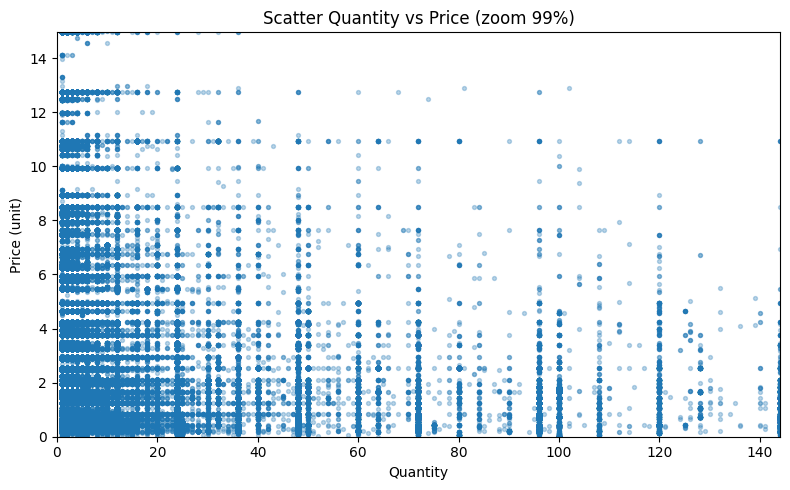

In [ ]:
# Scatter plot Quantity vs Price (zoom 99%)
plt.figure(figsize=(8, 5))
plt.scatter(df['Quantity'], df['Price'], alpha=0.3, s=8)

plt.xlim(0, df['Quantity'].quantile(0.99))
plt.ylim(0, df['Price'].quantile(0.99))

plt.xlabel("Quantity")
plt.ylabel("Price (unit)")
plt.title("Scatter Quantity vs Price (zoom 99%)")

plt.tight_layout()
plt.show()


**Analyse de la Corrélation Quantité-Prix (Scatter Plot) :**

Ce nuage de points illustre la relation entre le prix unitaire d'un produit et la quantité commandée par ligne de facture.

* **Structure en "L" :** Le graphique révèle une forme caractéristique en "L". La zone supérieure droite est vide, ce qui signifie que les produits chers ne sont jamais commandés en grande quantité. À l'inverse, les gros volumes (droite de l'axe X) concernent exclusivement des produits à bas prix unitaire.

* **Lignes verticales (Conditionnements) :** On observe des stries verticales très nettes et régulièrement espacées. En regardant l'axe des abscisses, ces lignes correspondent à des quantités spécifiques.

**Conclusion :**
Ces alignements verticaux confirment l'hypothèse d'une clientèle **professionnelle (B2B)** qui achète par lots standardisés (douzaines, grosses) ou par cartons complets. Le comportement d'achat est rationnel : le volume est réservé aux articles peu onéreux.

### 7b) Corrélation — Prix médian par tranche de quantité

Pour lisser la relation quantité–prix, on construit ici une courbe du **prix médian** en fonction de tranches de quantité (quantiles).

Cette représentation :
- réduit l’effet du bruit,
- met en évidence des tendances structurelles,
- facilite l’identification des comportements “grossistes”.

Chaque point représente une tranche de quantités ayant une fréquence équivalente dans les données.

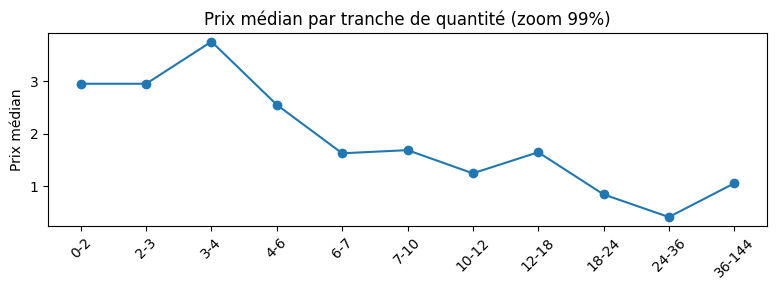

In [ ]:
# Courbe du prix médian par tranche de quantité (quantiles)
bins = pd.qcut(
    df['Quantity'].clip(upper=df['Quantity'].quantile(0.99)),
    q=20,
    duplicates='drop'
)

binned = df.groupby(bins, observed=True)['Price'].median()

plt.figure(figsize=(8, 3))
plt.plot(range(len(binned)), binned.values, marker='o')

plt.xticks(
    range(len(binned)),
    [f"{int(interval.left)}-{int(interval.right)}" for interval in binned.index],
    rotation=45
)

plt.title("Prix médian par tranche de quantité (zoom 99%)")
plt.ylabel("Prix médian")

plt.tight_layout()
plt.show()

**Analyse du Prix Médian par Volume d'Achat :**

Pour mieux interpréter le nuage de points précédent, nous avons agrégé les données afin d'observer le prix médian en fonction du volume acheté.

* **Tendance baissière générale :** La courbe confirme une corrélation inverse. Pour les petits achats (moins de 4 articles), le prix médian est élevé
* **Chute des prix sur les gros volumes :** Dès que les quantités augmentent, le prix unitaire médian s'effondre. Le point le plus bas est atteint pour la tranche **24-36 articles**
* **Comportement d'achat :** Cela valide l'hypothèse que les clients achetant en "gros" ciblent spécifiquement les produits les moins chers du catalogue

**Conclusion :**
Il existe une segmentation claire des produits : ceux vendus à l'unité sont plus onéreux, tandis que les produits de volume sont des articles à très faible coût unitaire.

### 8) Heatmap de rétention par cohorte (premier aperçu)

Cette représentation segmente les clients selon leur mois d’acquisition (cohorte) puis mesure leur activité dans les mois suivants.

Elle permet de comprendre :

- comment évoluent les comportements après le premier achat,  
- si certaines cohortes décrochent plus vite que d’autres,  
- quelles périodes d’acquisition génèrent les clients les plus fidèles,  
- la structure générale de la rétention (chute brutale ou décroissance progressive).

Cette heatmap constitue une première base pour aller vers une analyse RFM et fidélisation plus avancée.

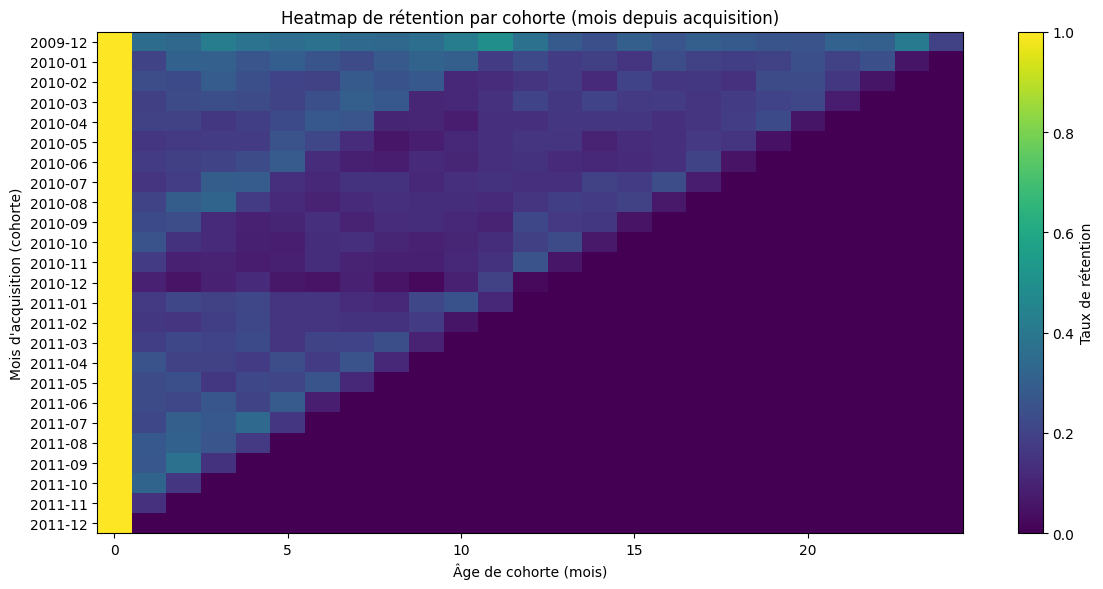

In [ ]:
# calculer la date du premier achat (cohort month) par client
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min().dt.to_period('M')
df['CohortMonth'] = df['Customer ID'].map(first_purchase)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
# âge en mois
df['CohortAge'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(lambda x: x.n)

cohort_counts = df.groupby(['CohortMonth', 'CohortAge'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortAge', values='Customer ID').fillna(0)
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# heatmap
plt.figure(figsize=(12,6))
plt.imshow(retention, aspect='auto', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Taux de rétention')
plt.title("Heatmap de rétention par cohorte (mois depuis acquisition)")
plt.xlabel("Âge de cohorte (mois)")
plt.ylabel("Mois d'acquisition (cohorte)")
plt.yticks(range(len(retention.index)), [str(idx) for idx in retention.index])
plt.tight_layout()
plt.show()


**Analyse de la Heatmap de Rétention par Cohorte :**

Cette matrice permet de suivre la fidélité des clients dans le temps. Chaque ligne représente un groupe de clients acquis le même mois (cohorte), et l'axe horizontal représente leur durée de vie (en mois) depuis le premier achat.

* **Attrition initiale brutale :** La colonne 0 (jaune) représente 100% des clients actifs au moment de l'achat. Dès le passage au mois +1 (colonne suivante), la couleur vire immédiatement au bleu foncé/violet. Cela indique une **chute drastique du taux de rétention**. La très grande majorité des clients ne passe pas de seconde commande le mois suivant leur acquisition.

* **Cyclicité annuelle (Saisonnalité) :** En observant la première ligne (cohorte 2009-12), on remarque un léger "éclaircissement" (teinte verdâtre) vers le mois +11 et +12. Cela signifie que les clients acquis lors des fêtes de fin d'année 2009 ont tendance à revenir acheter un an plus tard, pour les fêtes de 2010.

**Conclusion :**
La fidélité "naturelle" des clients est faible : ils achètent pour un besoin ponctuel et reviennent peu spontanément. L'entreprise doit impérativement mettre en place des leviers de rétention active (campagnes e-mailing, programme de fidélité, relances ciblées) pour contrer cette attrition massive dès le premier mois.

### 9) Conclusion générale

L’analyse complète du dataset met en évidence plusieurs tendances majeures qui structurent l’activité. Le marché apparaît d’abord comme **extrêmement concentré autour du Royaume-Uni**, qui représente presque l’intégralité des ventes, aussi bien en chiffre d’affaires qu’en quantités. Les autres pays contribuent de manière marginale, même si certains marchés européens ou anglophones montrent une légère présence. Cette domination se retrouve également dans les classements de produits, largement influencés par le comportement d’achat du marché britannique.

La dynamique des ventes révèle également **une saisonnalité très marquée**. Les courbes de quantités, de chiffre d’affaires ou de transactions montrent toutes un **pic net en fin d’année**, confirmant l’importance des périodes festives et des achats impulsifs. En dehors de cette pointe saisonnière, l’activité reste relativement stable, sans variations majeures.

L’étude des produits met en lumière **une structure en deux vitesses**. D’un côté, de nombreux articles se vendent en très grande quantité grâce à un prix unitaire faible, ce qui tire une partie essentielle du volume global. De l’autre, certains produits plus premium se distinguent par un prix élevé et contribuent fortement au chiffre d’affaires malgré des volumes plus faibles. Cette opposition crée un **équilibre intéressant entre volume et rentabilité**, qui se retrouve dans les différents classements des “top produits”.

L’ensemble des résultats montre aussi l’importance d’un **portefeuille produit diversifié**. Les best sellers ne sont pas les mêmes selon que l’on observe les quantités, le chiffre d’affaires ou les transactions, ce qui souligne que la performance ne dépend pas d’une seule typologie d’article mais d’une combinaison cohérente entre produits abordables et produits à forte valeur ajoutée.

Enfin, la distribution géographique et la performance des produits restent globalement cohérentes : le marché britannique domine, tandis que les marchés plus petits se tournent davantage vers des articles spécifiques ou plus premium. Cette lecture met en évidence **un modèle commercial stable**, centré sur un marché principal très fort, une saisonnalité clé et une stratégie produit équilibrée entre **volume**, **marge** et **spécificités géographiques**.


## 10) Questions d’analyse pour orienter la suite du projet

Les enseignements tirés des graphiques soulèvent plusieurs pistes d’analyse supplémentaires afin d’approfondir la compréhension du comportement des clients et notre application Streamlit :

- **Segmentation produits** :  
  Quels types de produits génèrent le plus de valeur ? Faut-il distinguer les produits "volume" des produits "premium" pour affiner les stratégies marketing ?

- **Analyse clients** :  
  Existe-t-il des groupes de clients qui commandent plus fréquemment ou dépensent davantage ? Les gros acheteurs sont-ils réguliers ou ponctuels ?

- **Analyse géographique** :  
  Le Royaume-Uni représentant la majorité des ventes, quelles opportunités existent dans les pays secondaires ? Certains marchés émergents justifient-ils un investissement ?

- **Optimisation horaire/journalière** :  
  Les pics d’activité observés (matin, jours de semaine) doivent-ils influencer les campagnes marketing ou le staffing logistique ?

- **Saisonnalité et prévision** :  
  Comment anticiper les pics très marqués de fin d’année ? Peut-on prédire la demande pour optimiser les stocks et éviter les ruptures ?

- **Performance des promotions ou événements** :  
  Certaines périodes montrent-elles une augmentation atypique des ventes, suggérant des campagnes à répliquer ou approfondir ?

